![](GMIT_Logo.jpg)

# Higher Diploma in Science in Computing (Data Analytics)
#### Programme Module: Programming for Data Analysis (COMP08050)
---
### Assignment 2020

The following assignment concerns the `numpy.random` package in Python. You are required to create a Jupyter notebook explaining the use of the package, including detailed explanations of at least five of the distributions provided for in the package.

There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

---

### 1. Explain the overall purpose of the package

Numerical Python more commonly referred to as NumPy is an open source Python library created in 2005 by Travis Oliphant. It contains multi-dimensional array and matrix data structures. Multi-dimensional arrays have more than one column (dimension), consider it like an excel spreadsheet. (Malik, 2020,(5)).

NumPy also has a large collection of high-level mathematical functions to operate on these arrays. One of the main uses of NumPy is its use in data analysis *“as a container for data to be passed between algorithms and libraries”*.(McKinney, 2018,(13)). These capabilities mean *“many numerical computing tools for Python either assume NumPy arrays as a primary data structure or else target seamless interoperability with NumPy”*.(McKinney, 2018,(13)).

Before explaining the overall purpose of the numpy.random module let’s have a quick overview of what random numbers are. Random refers to something that cannot be predicted logically. Randomness is useful in many areas such as simulating the impact of chance on stock markets or in the selection of representative samples of patients when testing new drugs. (Matthews, 2020,(6)). However, there is a problem when using randomness for making unbiased choices and that comes down to bias. *“The lack of bias only really appears in an infinitely long set of random numbers. In any given collection, there can be astonishingly long patterns”*. (Matthews, 2020,(6))

There are two types of random number.

1. True-Random: Truly random number sequences are generated by chance that contain no recognisable pattern or regularity. (Spacey, 2016,(8)).


2. Pseudo-Random: generated by computers, are not random as they are deterministic devices i.e., they are predictable by design. *“So, to create something unpredictable, they use mathematical algorithms to produce numbers that are random enough”*. (ComputerHope, 2019,(14))

The `numpy.random` module adds to the already built in Python `random` *“with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions”*. (McKinney, 2018,(13)).

`Numpy.random` and Python `random` although sharing the same algorithm work in different ways. In terms of efficiency, NumPy is most likely to perform better because arrays can be created without the need of a loop. (DiTect, 2020,(7)). Note: the algorithm used by NumPy has now changed. Previously Numpy used the Mersenne Twister as the core generator but with the introduction of the latest version 1.19 the core generator is now PCG64.

The Mersenne Twister was developed in 1997 by Makoto Matsumoto and Takuji Nishimura to try and rectify issues in older PRNG's. However, it is now considered to be not particularly fast and predictable, it is also not very space efficient. The PCG64 generator is considered faster and space efficient not requiring excessive memory to run. It is also challenging to predict but this does not mean it should be considered cryptographically secure

#### 1.1 Import required libraries

Below are the libraries I use in creating arrays and visualisations throught this notebook.

In [1]:
# import required modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.2 Notes

1. References: I have used the following style for references in this document. (Author, Year(Reference number)). For example (Matthews, 2020,(6)). 6 in this case refers to number 6 in the References section.


2. In the following notebook, I assume that you’ve imported NumPy, Seaborn and Matplotlib with the following code: import numpy as np, seborn as sns and matplotlib.pyplot as plt. Therefore were I refer to `np` this is Numpy.

3. Note that numpy.random(functions) are now a legacy function as of NumPy 1.17; NumPy 1.17 introduced a new random number generation system. The old functions in the numpy.random namespace will continue to work, but they are considered "frozen", with no ongoing development.


4. For the code sections in this notebook I will be using the syntax in  NumPy 1.19.0 which supports Python versions 3.6-3.8.

### 2. Explain the use of the "Simple random data" and "Permutations" functions

#### 2.1 Simple random data

There are various ways of creating arrays with random data in NumPy. The random.module provides convenient methods for doing this with the desired shape and distribution. “*You will find that most of the random functions have several variants that do more or less the same thing. They might vary in minor ways - parameter order, whether the value range is inclusive or exclusive etc. The basic set described below should be enough to do everything you need, but if you prefer to use the other variants, they will deliver the same results*”.(PythonInformer, 2019)

#### 2.2 Integers

Replaces `RandomState.randint` and `RandomState.random_integers`. It creates an array of integers. At its most basic it creates values in the range 0 to high i.e. integers from 0 up to but not including high. In the below example with a value of 4, it creates values in the range 0 to 3. Note that size is passed in as a named paramter.

In [2]:
rng = np.random.default_rng()
i=rng.integers(4,size=(3,4))
print(i)

[[3 2 2 3]
 [1 3 0 1]
 [0 3 2 1]]


You can also pass in two values, low and high, resulting in numbers in the range (low, high). For example to simulate a dice (output values 1 to 6 inclusive), you could use values 1 and 7:

In [3]:
rng = np.random.default_rng()
i=rng.integers(1,7,size=(10))
print(i)

[3 6 1 5 3 3 1 2 1 6]


#### 2.3 Random

This function produces an array of random numbers in the range 0.0 up to but not including 1.0. Remember this means the range will include anything from 0.0 up to the largest float that is less than 1 for example 0.99999999…. it will never include 1. The values will also be in a uniform distribution, meaning every value is equally likely to occur.

In [4]:
rng = np.random.default_rng()
r=rng.random((3, 2))
print(r)

[[0.65020009 0.52383939]
 [0.26508769 0.89619821]
 [0.90436374 0.90666886]]


#### 2.4 Choice

The concept of the NumPy `random.choice` is relatively easy to grasp, however implementing it can be difficult. Knowing the syntax and how it works is key.

First lets look at the syntax of `np.random.choice()`.

np.random.choice(a= , size = , replace = , p= )

1. `np.random.choice` is the function name.
2. `a` is the array you want to operate on.
3. `size` is the size of the output array.
4. `replace` is a true or false value that indicates whether you want to sample with replacement.
5. `p` are the probabilities associated with the elements of the input array.

Now lets look at putting this together using an example. In the example I want to select a random number i.e. a single integer from between 0-9. You can do this one of two ways either by using an array or not. For the first example we will use an array using the `numpy.arange` function.

In [5]:
array = np.arange(start = 0, stop = 10)

Lets see what this does.

In [6]:
print (array)

[0 1 2 3 4 5 6 7 8 9]


As expected it generates a list of integers between 0 and 9. Now lets select a random number from here.

In [7]:
np.random.choice(a = array)

0

In this instance it returned 7 , the next time it could be 8, next time 1 and so on. You can also produce this outcome by using a shorter syntax.

In [8]:
np.random.choice(10)

9

In this example, when we ran the code `np.random.choice(10)`a specific NumPy array was not provided as an input. Instead, the number 10 was provided. "*When we provide a number to `np.random.choice` this way, it will automatically create a NumPy array using NumPy arange. Effectively, the code np.random.choice(10) is identical to the code np.random.choice(a = np.arange(10)). So by running np.random.choice this way, it will create a new numpy array of values from 0 to 9 and pass that as the input to numpy.random.choice. This is essentially a shorthand way to both create an array of input values and then select from those values using the NumPy random choice function.*" (Ebner, 2019)

#### 2.4 Bytes

This function generates psedorandom bytes. It only has one parameter (length).

In [9]:
rng = np.random.default_rng()
b=rng.bytes(10)
print(b)

b'<\x7f\xeb\xe7\xe0\xb6~\xb2\x1f8'


#### 2.5 Permutations

Permutation is a mathematical term and permutation of a set is defined as the arrangement of it’s elements in a sequence or a linear order. If it is already arranged then permutation is the rearrangement of its elements in another sequence. The number of permutations of a specified data set can be calculated using a mathematical formula however NumPy provides two built in functions to do this namely the `permutation()` function and the `shuffle()` function. They are very similar; the functions are the same but they are different.

In `numpy.random` the permutation as already stated is built in. The permutation provides an array as an output. However, it doesn’t offer all the permutations of the array *“but only one in which we can find that the elements of the array have been re-arranged”*. (Sourcecodester, 2020). The permutation function returns a re-arranged array and leaves the original unchanged. So, the original array is intact and will return a shuffled array. If we have an array x=[1, 4, 2, 8] as the original the permutation may return a re-arranged array, say [8, 2, 1, 4]. Let’s look at an example to explain this further.


In [10]:
# create a numpy array
a = np.arange(12)
print (a)

# permute the results
b = np.random.permutation(a)
print (b)
print (a)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 6  4  5  9  7  1  2 10  8  3 11  0]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In the above array you can see that the original array is unchanged. Now lets look at the how the `shuffle()` function works.

In [11]:
# create a numpy array
a = np.arange(12)
print (a)

# shuffle the results
np.random.shuffle(a)
print (a)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 5  0 10  9  1  8  2  4  7 11  6  3]


`Permutation` does not directly operate on the original array, but returns a new array of scrambled orders, without changing the original array whereas the `shuffle` function directly operates on the original array, changing the order of the original array, no return value.(ProgrammerSought, 2020, (18))

---

### 3. Explain the use and purpose of at least five "Distributions" functions

#### 3.1 Uniform distribution

Uniform distribution is a type of probability distribution in which all outcomes are equally likely. For example, a coin toss has a uniform distribution, because the probability of getting heads or tails is the same. A uniform distribution can also be discrete or continuous. A discrete uniform distribution has a finite number of outcomes, for example the probability of landing on each side of a die. (Investopedia, 2020,(19)).

Alternatively, the continuous uniform distribution (also referred to as a rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values. (CFI, 2020,(20)). 

Let’s take 0.0 and 1.0 every point in the continuous range between these has an equal opportunity of appearing, yet there are an infinite number of points between them.

The syntax of np.random.default_rng().uniform is;

np.random.default_rng().uniform(low= , high= , size = )

1. `np.random.default_rng().uniform` is the function name.
2. `low` is the minimum.
3. `high` is the maximum.
4. `size` is the shape of the output NumPy array.

We can use the function to get a normal distribution using the below code.

In [12]:
#create the variables and assign them
x= np.random.default_rng().uniform(0.0, 1.0, 100000)

# print the array
print("Uniform distribution:\n", x)

Uniform distribution:
 [0.56049384 0.95783208 0.25753413 ... 0.21279686 0.57780031 0.39052523]


Now lets visualise the distribution.

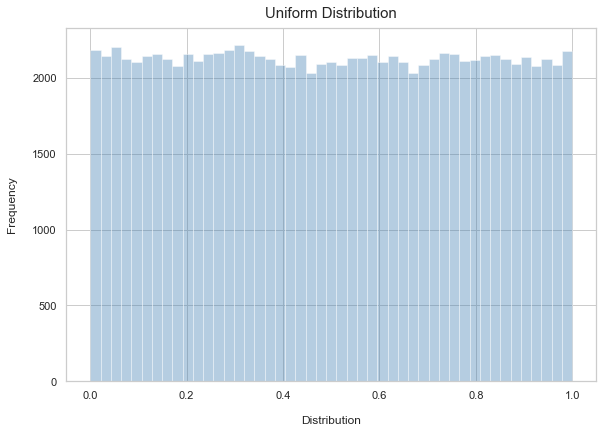

In [13]:
# visualise styling code
sns.set(rc={'figure.figsize':(9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")

# plotting
sns.distplot(x, kde=False, color='steelblue')
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Frequency", labelpad=15);
plt.title("Uniform Distribution", fontsize=15, y=1.012);

#### 3.2 Normal distribution

Normal distribution (Gaussian) in probability theory is a type of continuous probability distribution for a real valued random variable. The data can be distributed or spread out in different ways i.e. it can be more to the left, the right or it can be jumbled up. However, there are numerous instances “*where the data tends to be around a central value with no bias to the left or right and it gets close to a normal distribution*”. (MathsIsFun, 2020,(22)). 

This normally distributed data is shaped sort of like a “bell curve”. In NumPy the `numpy.random.generator.normal` gives you the ability to create an array that contains normally distributed data. Let’s have a look at this in more detail.

The syntax for np.random.default_rng().normal is is below

np.random.default_rng().normal(loc= , scale = , size= )

1. `np.random.default_rng().normal` is the function name.
2. `loc` is the mean (“centre”) of the distribution.
3. `scale` is the standard deviation (spread or “width”) of the distribution. Must be non-negative.
4. `size` is the shape of the output NumPy array.

We can use np.random.default_rng().normal to get a normal distribution

In [14]:
#create the variables and assign them
x = np.random.default_rng().normal(90, 2, 10000)

# print the array
print("Normal distribution:\n", x)

Normal distribution:
 [90.57271362 89.25574075 86.81578631 ... 86.21680435 90.21080032
 90.07655932]


Now lets visualise the distribution.

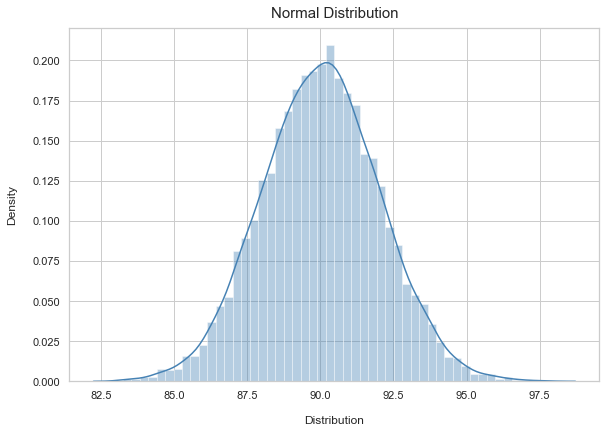

In [15]:
# visualisation styling code
sns.set(rc={'figure.figsize':(9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")

# 
sns.distplot(x, kde=True, color='steelblue')
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15);
plt.title("Normal Distribution", fontsize=15, y=1.012);

In a normal distribution, 68% of the data set will lie within ±1 standard deviation of the mean. 95% of the data set will lie within ±2 standard deviations of the mean. And 99.7% of the data set will lie within ±3 standard deviations of the mean. This is called the 68–95–99.7 rule.

#### 3.3 Exponential distribution

Exponential distribution is a widely used continuous distribution. It is often used to model the time elapsed between events. For example, the amount of time (beginning now) until an earthquake might occur. In physics it is used to measure radioactive decay or in engineering measuring the time associated with receiving a defective part on the production line. In finance it is used to “*measure the likelihood of incurring a specified number of defaults within a specified time period*”. (Science Direct, 2017,(26)). NumPy the `numpy.random.generator.exponential` gives you the ability to create an array that contains normally distributed data. Let’s have a look at this in more detail.

The syntax of random.default_rng().exponential is below

np.random.default_rng().exponential(scale= , size = )

1. `np.random.exponential` is the function name.
2. `scale` is the inverse of the rate which is by default set to 1.0.
3. `size` is the number of values drawn from an exponential distribution.


We can use random.exponential() to get a exponential distribution.

In [16]:
#create the variables and assign them
x = np.random.default_rng().exponential(scale=2, size=(4,8))

# print the array
print("Exponential distribution:\n",x)

Exponential distribution:
 [[ 3.17925918  1.58800326  1.61606905  2.18032086  2.12419553  0.01889831
   1.80533153  0.43673251]
 [ 0.83206156  3.40003839  2.45928333 12.23345312  4.35194858  4.39474039
   4.89364781  1.87699757]
 [ 0.39655865  4.99349321  0.13215664  2.16549374  1.87007429  5.53096589
   0.02874058  0.19972706]
 [ 1.20275042  1.26549998  2.2422125   0.71458957  0.71531257  2.95081693
   2.81714052  2.50866209]]


Time to visualise how this looks.

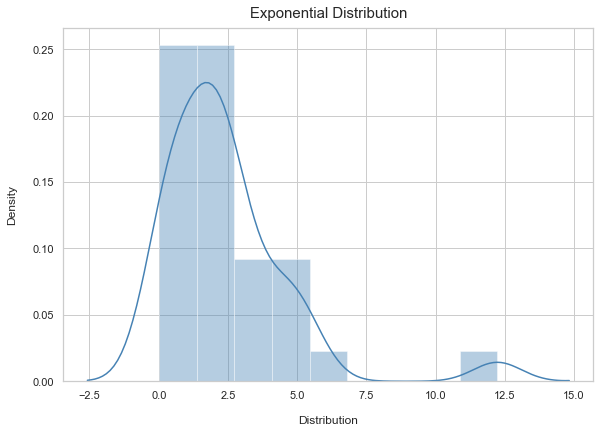

In [17]:
# visualisation styling code
sns.set(rc={'figure.figsize':(9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")

# 
sns.distplot(x, kde=True, color='steelblue')
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15);
plt.title("Exponential Distribution", fontsize=15, y=1.012);

#### 3.4 Binomial distribution

Binomial distribution is the probability distribution of a sequence of experiments, where each experiment produces a binary outcome and where each of the outcomes is independent of all others. (Towards Data Science, 2019). In simple terms it is the probability of a of a success or failure outcome. (Statistics How to, 2020,(29)). The distribution of these binary scenarios is obtained by performing a number of “Bernolli” trials, which are assumed to meet each of the following criteria: (a) only two possible outcomes (b) each outcome has a fixed probability of occurring and (c) each trial is completely independent of all others. (GeeksforGeeks, 2020,(27)).

In real life binomial distributions are found everywhere. "*For example, if a new drug is introduced to cure a disease, it either cures the disease (it’s successful) or it doesn’t cure the disease (it’s a failure). If you purchase a lottery ticket, you’re either going to win money, or you aren’t. Basically, anything you can think of that can only be a success or a failure can be represented by a binomial distribution"*. (Statistics How to, 2020(29)).

The syntax of random.default_rng().binomial is

np.random.default_rng().binomial (n= , p = , size= )

1. `np.random.default_rng().binomial` is the function name.
2. `n` is the number of trials.
3. `p` is the probability of occurrence.
3. `size` is the shape of returned array.


We can use random.default_rng().binomial to get a binomial distribution.

In [18]:
#create the variables and assign them
x = np.random.default_rng().binomial(10, 0.5, 1000)

# print the array
print("Binomial distribution:\n",x);

Binomial distribution:
 [ 7  5  5  5  3  5  8  4  6  6  6  5  5  5  4  6  7  6  4  6  5  5  4  4
  6  6  4  5  5  4  6  4  7  4  1  6  6  5  5  6  4  6  6  5  2  5  5  1
  1  6  7  6  5  5  2  4  3  6  3  3  8  5  9  4  7  6  6  4  4  3  4  6
  5  6  4  2  7  6  6  6  6  4  7  4  5  4  5  5  3  3  8  7  5  7  6  3
  4  5  6  7  4  5  3  5  3  6  3  6  7  3  8  3  5  4  3  8  1  6  7  4
  2  5  6  4  5  0  5  3  5  6  4  5  5  6  7  6  6  4  3  6  6  5  4  4
  3  4  5  5  5  8  7  3  6  7  5  7  4  3  4  4  6  4  5  4  5  5  4  5
  4  5  4  6  3  7  4  4  9  7  5  6  3  6  7  2  5  2  1  9  4  3  3  6
  6  8  7  1  7  6  9  4  4  6  4  7  7  3  3  6  3  6  4  2  6  3  7  2
  7  4  6  4  8  5  4  6  5  5  6  5  5  5  4  4  5  7  7  7  5  3  4  6
  6  5  4  3  5  4  4  2  6  4  4  5  3  6  5  6  4  3  4  3  7  3  5  6
  6  7  6  4  2  4  6  7  6  4  3  6  5  4  3  6  5  7  6  5  6  4  3  2
  4  4  2  3  3  6  5  4  4  5  4  4  3  5  3  7  4  6  3  7  5  4  7  5
  5  2  4  6  4  3  3  6  5

Lets see what this looks like.

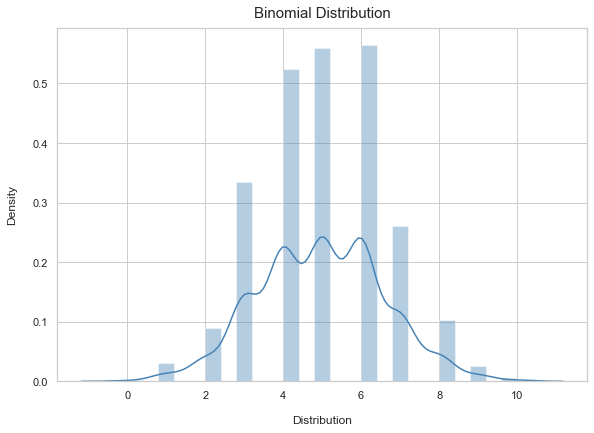

In [19]:
# visualisation styling code
sns.set(rc={'figure.figsize':(9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")

# 
sns.distplot(x, kde=True, color='steelblue')
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15);
plt.title("Binomial Distribution", fontsize=15, y=1.012);

#### 3.5 Poisson distribution

A Poisson distribution is a probability distribution which indicates how often an event is likely to occur within a specific time period. It is a discrete function “meaning that the event can only be measured in whole numbers”. (Investopedia, 2019)

The syntax of random.default_rng().poisson is

np.random.default_rng().poisson(lam= , size=)

1. `np.random.default_rng().poisson` is the function name.
2. `lam` is the xpectation of interval, must be >= 0. A sequence of expectation intervals must be broadcastable over the requested size.
3. `size` is the Output shape.


We can use random.default_rng().poisson to get a binomial distribution.

In [20]:
#create the variables and assign them
x = np.random.default_rng().poisson(1, 100)

# print the array
print("Poisson distribution:\n",x)

Poisson distribution:
 [1 0 0 4 1 4 2 0 2 0 3 1 1 1 5 1 0 1 1 2 0 1 0 0 0 0 0 2 2 3 0 1 1 0 1 2 2
 2 0 1 2 0 0 2 0 0 0 0 2 0 0 0 1 0 0 0 1 2 2 1 2 1 3 2 0 1 1 0 1 0 1 0 0 0
 0 0 1 1 1 1 2 1 0 0 1 3 0 0 0 2 0 0 4 3 0 3 0 1 2 0]


Finally lets have a look at the plot of the distribution.

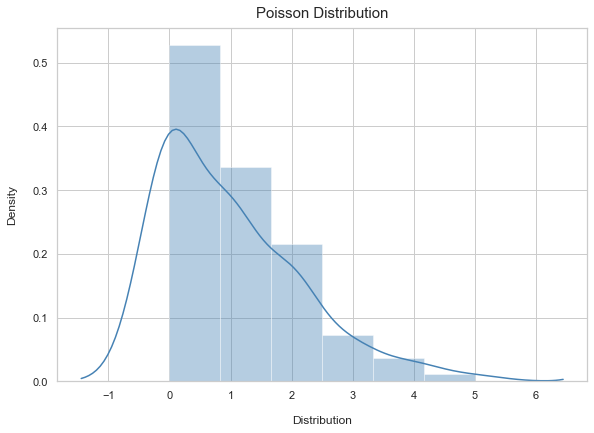

In [21]:
# visualisation styling code
sns.set(rc={'figure.figsize':(9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")

# 
sns.distplot(x, kde=True, color='steelblue')
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15);
plt.title("Poisson Distribution", fontsize=15, y=1.012);

### 4. Explain the use of seeds in generating pseudorandom numbers.

As stated previously in this notebook pseudo-random numbers are generated by computers. Integral to creating them is a pseudo-random number generator or (PRNG). It may also be referred to as a DRNG (digital random number generator) or a DRBG (deterministic random bit generator). They are programs or functions which use mathematics to simulate randomness. For data scientists this is useful, because we take advantage of this to produce code that is both “random” and “reproducible”. This is done by using “seeds”. (Practical Data Science, 2020).

The (PRNG) uses a random seed to specify the “start point when a computer generates a random number sequence. It can be any number, but it usually comes from seconds on a computer system’s clock”. (Statistics How to, 2020). In NumPy random seed is simply a function that sets the random seed of the NumPy (PRNG) and is an integral part of the numpy.random package. (Sharp Sight, 2019).

Now lets look at explaing this using Numpy. We won't use the seed element first, we will just generate 5 random numbers.

In [22]:
rng = np.random.default_rng()
rng.integers(0,100,5)

array([41, 24, 65, 75, 21], dtype=int64)

Lets try that again and see what we get.

In [23]:
rng = np.random.default_rng()
rng.integers(0,100,5)

array([64, 40, 82, 45, 74], dtype=int64)

As you can see we get different results.

Lets see what happens when we use NumPy seed.

In [24]:
rng = np.random.default_rng(1)
rng.integers(0,100,5)


array([47, 51, 75, 95,  3], dtype=int64)

In [25]:
rng = np.random.default_rng(1)
rng.integers(0,100,5)

array([47, 51, 75, 95,  3], dtype=int64)

### 5. References

[1] DataCamp Community. 2020. *(Tutorial) Random Number Generator Using Numpy*. [online] Available at: <https://www.datacamp.com/community/tutorials/numpy-random> [Accessed 3 November 2020].

[2] Bhattacharjya, D., 2020. *Numpy.Random.Seed(101) Explained*. [online] Medium. Available at: <https://medium.com/@debanjana.bhattacharyya9818/numpy-random-seed-101-explained-2e96ee3fd90b> [Accessed 4 November 2020].

[3] MLK - Machine Learning Knowledge. 2020. *Complete Numpy Random Tutorial - Rand, Randn, Randint, Normal, Uniform, Binomial And More | MLK - Machine Learning Knowledge*. [online] Available at: <https://machinelearningknowledge.ai/numpy-random-rand-randn-randint-normal-uniform-binomial-poisson-sample-choice/> [Accessed 6 November 2020].

[4] Cui, Y., 2020. *A Cheat Sheet On Generating Random Numbers In Numpy*. [online] Medium. Available at: <https://towardsdatascience.com/a-cheat-sheet-on-generating-random-numbers-in-numpy-5fe95ec2286> [Accessed 4 November 2020].

[5] Malik, U., 2020. *Numpy Tutorial: A Simple Example-Based Guide*. [online] Stack Abuse. Available at: <https://stackabuse.com/numpy-tutorial-a-simple-example-based-guide/#therandommethod> [Accessed 4 November 2020].

[6] Matthews, R., 2020. *Is Anything Truly Random?*. [online] BBC Science Focus Magazine. Available at: <https://www.sciencefocus.com/science/is-anything-truly-random/> [Accessed 8 November 2020].

[7] Iditect.com. 2020. *Performance Difference Between Numpy.Random And Random.Random In Python*. [online] Available at: <https://www.iditect.com/how-to/57220804.html> [Accessed 8 November 2020].

[8] Spacey, J., 2016. *Pseudorandom Vs Random*. [online] Simplicable. Available at: <https://simplicable.com/new/pseudorandom-vs-random> [Accessed 6 November 2020].

[9] Tamilselvan, S., 2020. *Random Numbers In Numpy*. [online] Medium. Available at: <https://medium.com/analytics-vidhya/random-numbers-in-numpy-29e929f16c70> [Accessed 4 November 2020].

[10] Technology, F., 2020. *Can A Computer Generate A Truly Random Number?*. [online] BBC Science Focus Magazine. Available at: <https://www.sciencefocus.com/future-technology/can-a-computer-generate-a-truly-random-number/> [Accessed 8 November 2020].

[11] Thomas, A., 2020. *Good Practices With Numpy Random Number Generators*. [online] Albert Thomas. Available at: <https://albertcthomas.github.io/good-practices-random-number-generators/> [Accessed 5 November 2020].

[12] Tutorial Links. 2020. *What Is Numpy Random Intro | Numpy Tutorial*. [online] Available at: <https://tutorialslink.com/Articles/What-is-NumPy-Random-Intro-NumPy-Tutorial/1924> [Accessed 6 November 2020].

[13] McKinney, W., 2018. *Python For Data Analysis*. 2nd ed. O'Reilly.

[14] Computerhope.com. 2019. *What Is Pseudorandom?*. [online] Available at: <https://www.computerhope.com/jargon/p/pseudo-random.htm> [Accessed 8 November 2020].

[15] Ebner, J., 2019. *How To Create Random Samples With Python's Numpy.Random.Choice*. [online] Sharp Sight. Available at: <https://www.sharpsightlabs.com/blog/numpy-random-choice/> [Accessed 7 November 2020].

[16] Sourcecodester. 2020. *Numpy Permutations | Free Source Code & Tutorials*. [online] Available at: <https://www.sourcecodester.com/book/python/14297/numpy-permutations.html> [Accessed 10 November 2020].

[17] Stack Overflow. 2020. *Shuffle Vs Permute Numpy*. [online] Available at: <https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy> [Accessed 10 November 2020].

[18] Programmersought.com. 2020. *The Difference Between Shuffle And Permutation In Numpy.Random*. [online] Available at: <https://www.programmersought.com/article/32541516928/> [Accessed 10 November 2020].

[19] Chen, J., 2020. *Uniform Distribution Definition*. [online] Investopedia. Available at: <https://www.investopedia.com/terms/u/uniform-distribution.asp> [Accessed 10 November 2020].

[20] Corporate Finance Institute. 2020. *Uniform Distribution - Overview, Examples, And Types*. [online] Available at: <https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/> [Accessed 10 November 2020].

[21] Taylor, C., 2019. *What Is A Uniform Distribution?*. [online] ThoughtCo. Available at: <https://www.thoughtco.com/uniform-distribution-3126573> [Accessed 10 November 2020].

[22] Mathsisfun.com. 2020. *Normal Distribution*. [online] Available at: <https://www.mathsisfun.com/data/standard-normal-distribution.html> [Accessed 11 November 2020].

[23] Ebner, J., 2020. *How To Use Numpy Random Normal In Python*. [online] Sharp Sight. Available at: <https://www.sharpsightlabs.com/blog/numpy-random-normal/> [Accessed 11 November 2020].

[24] Learningaboutelectronics.com. 2018. *How To Create A Normal Distribution Plot In Python With The Numpy And Matplotlib Modules*. [online] Available at: <http://www.learningaboutelectronics.com/Articles/How-to-create-a-normal-distribution-plot-in-Python-with-numpy-and-matplotlib.php> [Accessed 11 November 2020].

[25] En.wikipedia.org. 2020. *68–95–99.7 Rule*. [online] Available at: <https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule> [Accessed 11 November 2020].

[26] Sciencedirect.com. 2017. *Exponential Distribution - An Overview* | Sciencedirect Topics. [online] Available at: <https://www.sciencedirect.com/topics/mathematics/exponential-distribution> [Accessed 11 November 2020].

[27] GeeksforGeeks. 2020. *Python - Binomial Distribution* - Geeksforgeeks. [online] Available at: <https://www.geeksforgeeks.org/python-binomial-distribution/> [Accessed 12 November 2020].

[28] Yiu, T., 2019. *Fun With The Binomial Distribution*. [online] Medium. Available at: <https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b> [Accessed 12 November 2020].

[29] Statistics How To. 2020. *Binomial Distribution: Formula, What It Is, And How To Use It In Simple Steps*. [online] Available at: <https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/> [Accessed 12 November 2020].

[30] Sharma, V., 2020. *Probability For Data Science With Numpy*. [online] Medium. Available at: <https://levelup.gitconnected.com/probability-for-data-science-with-numpy-7e76e5e65910> [Accessed 12 November 2020].

[31] Python and R Tips. 2018. *Simulating Coin Toss Experiment In Python With Numpy - Python And R Tips*. [online] Available at: <https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/> [Accessed 12 November 2020].

[32] Statistics How To. 2020. *Random Seed: Definition - Statistics How To*. [online] Available at: <https://www.statisticshowto.com/random-seed-definition/> [Accessed 15 November 2020].

[33] Ebner, J., 2019. *Numpy Random Seed Explained*. [online] Sharp Sight. Available at: <https://www.sharpsightlabs.com/blog/numpy-random-seed/> [Accessed 15 November 2020].

[34] Practicaldatascience.org. 2020. *Numbers In Computers — Practical Data Science*. [online] Available at: <https://www.practicaldatascience.org/html/ints_and_floats.html> [Accessed 15 November 2020].